## NAC Player Classification

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv("football_data.csv")

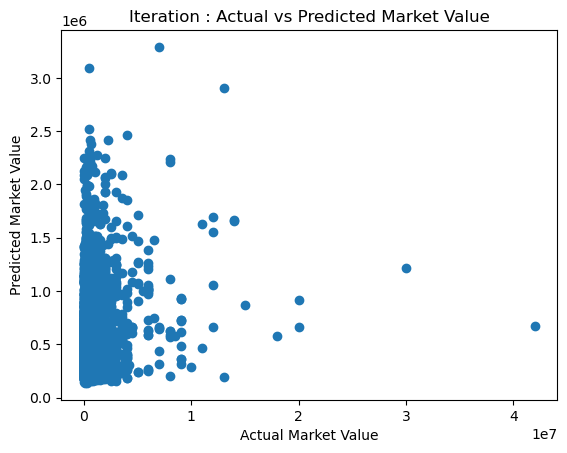

Mean Squared Error (Iteration ): 1502414171698.5298
Mean Squared Error (Iteration): 1502414171698.5298
R2 Score (Iteration): 0.04352274098101194


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

fb_copy = fb[["Position", "Goals", "Market value", "Age","Matches played", "Assists", "xG", "xA" ]].copy()

features = ["Age", "Matches played", "Assists", "xG", "xA", ]
fb_copy["Position"] = fb_copy["Position"].str.split(', ')

# Explode the lists into separate rows
fb_copy_explode = fb_copy.explode("Position")
fb_copy_explode = fb_copy_explode.dropna(subset=features + ["Market value"])

# Use LabelEncoder to encode positions
le = LabelEncoder()
fb_copy_explode["Position_encoded"] = le.fit_transform(fb_copy_explode["Position"])
y_iteration1 = fb_copy_explode["Market value"]
features.append("Position_encoded") 
# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_iteration1 = fb_copy_explode[features]
X_iteration1 = imputer.fit_transform(X_iteration1)

# Impute missing values
X_iteration = fb_copy_explode[features]

# Reorder columns to match the order during fit
X_iteration = X_iteration[features]

# Use the same imputer to transform the data
X_iteration = imputer.transform(X_iteration)

# Training and Testing
X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_iteration, y_iteration1, test_size=0.2, random_state=42)

# Create a linear regression model for iteration 2
model_iter = LinearRegression()
model_iter.fit(X_train_iter, y_train_iter)
y_pred_iter = model_iter.predict(X_test_iter)



# Create bins for Market Value
value_bins = [0, 50_000, 300_000, 1_000_000, 10_000_000, 50_000_000, float('inf')]
bin_labels = ['really_low value of price', 'low vallue of price', "Affordable value of price", 'Medium value of price', "High value of price", "Highest value of price"]

fb_copy_explode['Bin'] = pd.cut(fb_copy_explode['Market value'], bins=value_bins, labels=bin_labels)

# Convert the 'Bin' column to numeric encoding
le_bin = LabelEncoder()
fb_copy_explode['Bin_encoded'] = le_bin.fit_transform(fb_copy_explode['Bin'])

# Update features list
features.append('Bin_encoded')

# Training and Testing
X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_iteration, y_iteration1, test_size=0.2, random_state=42)

# Create a linear regression model for iteration 
model_iter = LinearRegression()
model_iter.fit(X_train_iter, y_train_iter)
y_pred_iter = model_iter.predict(X_test_iter)
#Logistic Regression
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train_iter, y_train_iter)
#knn regression
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_iter, y_train_iter)
knn = neigh.predict(X_test_iter)
# Visualization for iteration 
plt.scatter(y_test_iter, y_pred_iter)
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Iteration : Actual vs Predicted Market Value")
plt.show()

mse_iter = mean_squared_error(y_test_iter, y_pred_iter)
print("Mean Squared Error (Iteration ):", mse_iter)
 


# Evaluate the model
mse_iter = mean_squared_error(y_test_iter, y_pred_iter)
print("Mean Squared Error (Iteration):", mse_iter)

# Optionally, you can calculate and print other regression metrics
# For example, you can use R2 score:
r2_iter = r2_score(y_test_iter, y_pred_iter)
print("R2 Score (Iteration):", r2_iter)

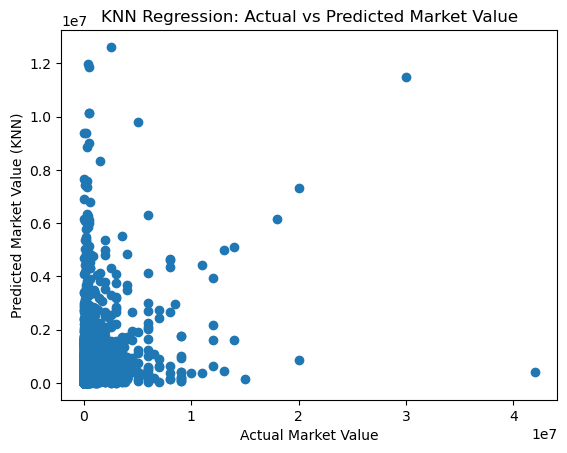

Mean Squared Error (KNN): 1696010211243.6697


In [35]:
from sklearn.neighbors import KNeighborsRegressor


# Create bins for Market Value
value_bins = [0, 50_000, 300_000, 1_000_000, 10_000_000, 50_000_000, float('inf')]
bin_labels = ['really_low value of price', 'low value of price', "Affordable value of price", 'Medium value of price', "High value of price", "Highest value of price"]

fb_copy_explode['Bin'] = pd.cut(fb_copy_explode['Market value'], bins=value_bins, labels=bin_labels)

# Convert the 'Bin' column to numeric encoding
le_bin = LabelEncoder()
fb_copy_explode['Bin_encoded'] = le_bin.fit_transform(fb_copy_explode['Bin'])

# Update features list
features.append('Bin_encoded')

# Training and Testing
X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_iteration, y_iteration1, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors regressor for iteration 
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_iter, y_train_iter)
y_pred_knn = knn_regressor.predict(X_test_iter)

# Visualization for iteration 
plt.scatter(y_test_iter, y_pred_knn)
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value (KNN)")
plt.title("KNN Regression: Actual vs Predicted Market Value")
plt.show()

# Evaluate the KNN model using regression metrics
mse_knn = mean_squared_error(y_test_iter, y_pred_knn)
print("Mean Squared Error (KNN):", mse_knn)
